# ME 536 TERM PROJECT
## FELINE DETECTOR
### SUBMITTED BY : REHA OĞUZ USLU
### 2308500

#### Additioal Drive Link For Dataset and Reports : https://drive.google.com/drive/folders/1ArC6LMZw1vEjuvnoQ9DavJD4cDkjdi-U?usp=sharing

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2023-01-29 17:13:17.671343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## ***PREPROCESSING***

### Preprocessing Training Data

   

 * **There exist 4 clsses such as lion, tiger, leopard and cheetah.**
 * **All classes have 700 training image and 300 test image.**

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
training_set = train_datagen.flow_from_directory(
    'training_dataset',
    target_size = (64,64),
    batch_size = 1,
    class_mode = 'categorical')



Found 2800 images belonging to 4 classes.


### Preprocessing Test Data

In [3]:
test_set = train_datagen.flow_from_directory(
    'test_dataset',
    target_size = (64,64),
    batch_size = 1,
    class_mode = 'categorical')

Found 1200 images belonging to 4 classes.


## ***CNN***

### Installing CNN


* **Firstly convolution and maxpooling is done by convolutional neural network.**
* **Keras is used for CNN from TensorFlow.**

In [4]:
cnn = tf.keras.models.Sequential()

2023-01-29 17:14:03.705093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### First Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation = 'relu',input_shape=[64,64,3]))

### First Pooling Layer

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Second Layer For CNN

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

* **Now we will try to use specified kernel/filter on our data to improve our results.**

In [8]:
data = cnn.predict(training_set)

2800/2800 [==============================] - 9s 3ms/step


* **Check dimensions of data**
    * **Expect to see 4D tensor**

In [9]:
data.shape

(2800, 14, 14, 8)

* **Okey!! 1. dimension indicates number of data (2800 images)**
* **2. and 3. dimensiones  indicate convolved and pooled images height and width (rememeber initially we have 64x64 images).**
* **Last dimension shows the batch size/channels.**

## ***FILTERING***

### Creating Filter/Kernel

In [10]:
kernel = tf.constant([
    [0, -1,  0],
    [-1, 4, -1],
    [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0],[0, -1,  0],[-1, 4, -1], [0, -1,  0],
    [0, -1,  0],[-1, 4, -1], [0, -1,  0]
    
], dtype=tf.float32, name='kernel')

In [11]:
kernel = tf.reshape(kernel, [3, 3, 1, 32], name='kernel')

### Filtered Data With Specified Kernel

In [12]:
filtered_data= tf.nn.conv2d(
    data, kernel, [1,1,1,1], 'VALID', 
    data_format='NHWC', dilations=[1, 1, 1, 1], name='kerneled'
)


* **Expect to see 12x12 image after convolution (remember we have images 14x14)**

In [13]:
filtered_data.shape

TensorShape([2800, 12, 12, 32])

### Use 5x5 Kernel For This Time

In [14]:
kernel2 = tf.constant([
    [1, 1, 1, 1,1],
    [1,-1,-1,-1,1],
    [1,-1,-1,-1,1],
    [1,-1,-1,-1,1],
    [1, 1, 1, 1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],
    [1,1,1,1,1],[1,-1,-1,-1,1],[1, -1, -1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,1],


], dtype=tf.float32, name='kernel')

In [15]:
kernel2 = tf.reshape(kernel2, [5, 5, 1, 32], name='kernel')

In [16]:
filtered_data2= tf.nn.conv2d(
    filtered_data, kernel2, [1,1,1,1], 'VALID', 
    data_format='NHWC', dilations=[1, 1, 1, 1], name='kerneled'
)

In [17]:
filtered_data2.shape

TensorShape([2800, 8, 8, 32])

* **Now we need to flatten our data for PCA Analysis**

### Flattening Data

In [18]:
flatter = tf.keras.models.Sequential()

In [19]:
flatter.add(tf.keras.layers.Flatten())

In [20]:
flatten_data = flatter.predict(filtered_data2)

88/88 [==============================] - 0s 1ms/step


* **We expect to see 2800 data point with 8x8x32 = 2048 dimensions.**

In [21]:
flatten_data.shape

(2800, 2048)

## ***PCA ANALYSIS***

### Zero Mean Data

In [22]:
def ZeroMean(M):
    return M - M.mean(axis=1).reshape((M.shape[0],1))

In [23]:
data_zm = ZeroMean(flatten_data.T)

### SVD

In [24]:
U,S,VT = np.linalg.svd(data_zm,full_matrices=False)

* **Let look sigma values graphically to estimate real rank.**

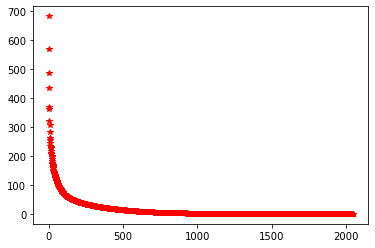

In [25]:
plt.plot(S,'r*')

In [26]:
print(S[0:15])l

[681.514   568.7508  484.87863 433.18994 368.97595 362.8315  321.13245
 307.0515  282.2572  262.87512 260.6739  253.4559  243.00989 234.03564
 230.56721]


* **It looks like real rank is 1.**
* **Check rank by np.linalg.**

In [27]:
np.linalg.matrix_rank(data_zm)

1204

* **1024?? WOW**
* **Check energy method!**

In [56]:
t = 0
for i in range(len(S)-1):
    t = t + (S[i])**2

In [29]:
k = 0 
r = 0 
for i in range(len(S)):
    k = k + (S[i])**2
    if k >= 0.9*t :
        break
    r = r + 1


In [30]:
print(f'Total energy:{t}\nRank Energy:{k}\nReal Rank:{r}')

Total energy:3987717.9350517844
Rank Energy:3589100.8272624
Real Rank:126


* **Energy method indicates rank 8, however it is obvious that our rank is actualy 1.**

In [32]:
rank_mat = 126

In [33]:
data_w_pca = np.matmul(U[:,rank_mat].reshape(-1,1),VT[rank_mat,:].reshape(1,-1))

* **Again take transpose, since we take transpose before zero mean data.**

In [34]:
data_w_pca = data_w_pca.T

In [35]:
data_w_pca.shape

(2800, 2048)

## ANN

In [36]:
ann = tf.keras.models.Sequential()

In [37]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))


In [38]:
ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [39]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

* **We need result matrix for ANN to learn which data point belongs to which cluster.**
* **Also y_set array should be one hot encoded to be compatible with ANN**

In [40]:
a = np.zeros(700)
b = 1*np.ones(700)
c = 2*np.ones(700)
d = 3*np.ones(700)

y_set = np.concatenate((a,b,c,d))

In [41]:
y_set_ =tf.one_hot(
    y_set,
    4,
    on_value=1,
    off_value=0,
    axis=-1,
    dtype=None,
    name=None)

### Train ANN

In [42]:
ann.fit(data_w_pca, y_set_, batch_size = 32, epochs = 100)

Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 1.3866 - accuracy: 0.2482
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3861 - accuracy: 0.2579
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3860 - accuracy: 0.2511
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 1.3857 - accuracy: 0.2664
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.2671
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.2593
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3855 - accuracy: 0.2621
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.2671
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3857 - accuracy: 0.2636
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.2671
Epoch 11/

88/88 [==============================] - 0s 2ms/step - loss: 1.3836 - accuracy: 0.2664
Epoch 84/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3834 - accuracy: 0.2668
Epoch 85/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3836 - accuracy: 0.2675
Epoch 86/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3833 - accuracy: 0.2657
Epoch 87/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3832 - accuracy: 0.2643
Epoch 88/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3833 - accuracy: 0.2689
Epoch 89/100
88/88 [==============================] - 0s 2ms/step - loss: 1.3832 - accuracy: 0.2639
Epoch 90/100
88/88 [==============================] - 0s 3ms/step - loss: 1.3831 - accuracy: 0.2704
Epoch 91/100
88/88 [==============================] - 0s 3ms/step - loss: 1.3831 - accuracy: 0.2725
Epoch 92/100
88/88 [==============================] - 0s 3ms/step - loss: 1.3832 - accuracy: 0.2668
Epoch 93/100


### Preprocessing  Single Test Image

In [104]:
test_image = train_datagen.flow_from_directory(
    'test_image',
    target_size = (64,64),
    batch_size = 1,
    class_mode = 'categorical')


Found 1 images belonging to 1 classes.


In [105]:
test_image = cnn.predict(test_image)

1/1 [==============================] - 0s 44ms/step


In [106]:
test_image.shape

(1, 14, 14, 8)

In [107]:
filtered_test_img = tf.nn.conv2d(
    test_image, kernel, [1,1,1,1], 'VALID', 
    data_format='NHWC', dilations=[1, 1, 1, 1], name='kerneled'
)


In [108]:
filtered_test_img_fnl = tf.nn.conv2d(
    filtered_test_img, kernel2, [1,1,1,1], 'VALID', 
    data_format='NHWC', dilations=[1, 1, 1, 1], name='kerneled'
)


In [109]:
filtered_test_img = flatter.predict(filtered_test_img_fnl)

1/1 [==============================] - 0s 30ms/step


In [110]:
filtered_test_img = ZeroMean(filtered_test_img)

In [111]:
filtered_test_img.shape

(1, 2048)

### Result

In [112]:
result = ann.predict(filtered_test_img)
training_set.class_indices
      
print(cnn.summary())

1/1 [==============================] - 0s 21ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________
No

### Creating Tresholds For Nolvalty Detection

In [113]:
print(f"Tiger Similarity : {result[0][2]*100}% \nLion Similarity : {result[0][1]*100}% \nLeopard Similarity : {result[0][0]*100}% \nCheetah Similarity : {result[0][3]*100}% ")


Tiger Similarity : 23.25342893600464% 
Lion Similarity : 21.371516585350037% 
Leopard Similarity : 18.614377081394196% 
Cheetah Similarity : 36.76068186759949% 


### Result Printer

In [114]:
m = max(result[0])
if m*100<50 and m*100>30:
    print('NEW \nNEW KIND OF FELINE \n')
elif m*100<=30:
    print('NEW \nNOT FELINE\n')
else:
    print(f'NOT NEW')
    
    if m == result[0][0]:
        print('IT IS TIGER!')
    elif m == result[0][1]:
        print('IT IS LION!')
    elif m == result[0][0]:
        print('IT IS LEOPARD!')
    else:
        print('IT IS CHETAH!')

NEW 
NEW KIND OF FELINE 

